In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
# data = pd.read_excel('./laptop_data.xlsx')
# data

data = pd.read_csv('./laptop.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
data.duplicated().sum() #no duplicate columns

0

In [6]:
data.isnull().sum() # no null values present

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Task to do for data cleaning
- delete first column Unnamed:0
- remove string data from screen resolution column
- remove GB from ram and make it int32
- remove kg from weight and make it float
- make price as int

In [7]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')
data['Price'] = data['Price'].astype(int)

In [9]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [10]:
data['Company'].unique() # everthing is fine

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [11]:
data['TypeName'].unique() # everything is fine

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [12]:
data['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [13]:
data['ScreenResolution'].unique() # make a lot of changes 

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [14]:
data['Cpu'].unique() # need to make changes

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

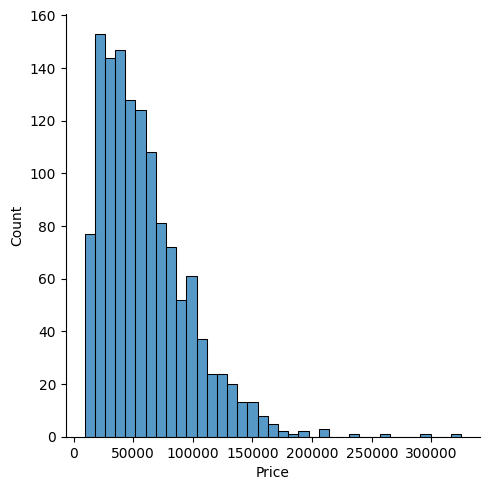

In [15]:
import seaborn as sns
sns.displot(data['Price'])

<Axes: xlabel='Company'>

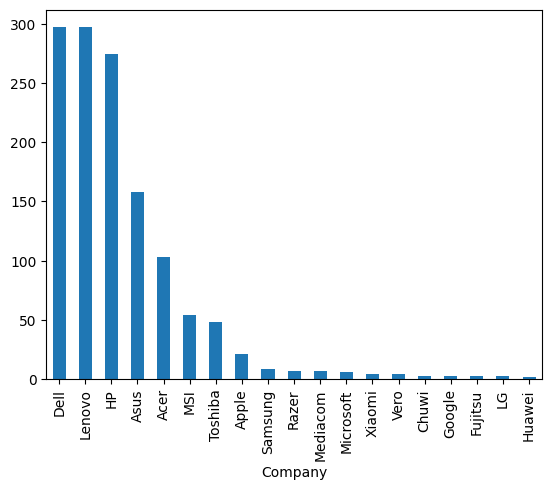

In [16]:
data['Company'].value_counts().plot(kind='bar')

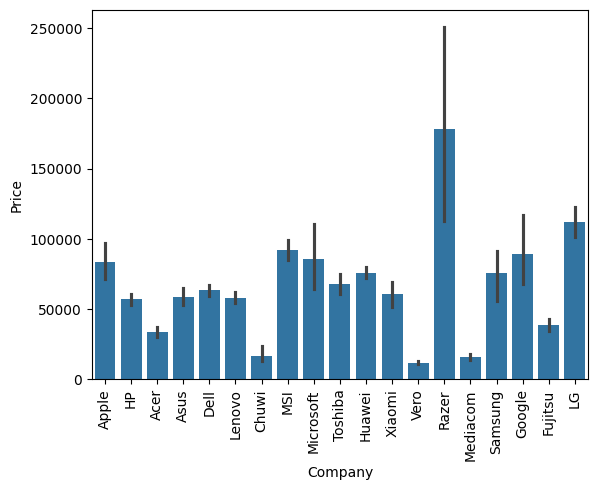

In [17]:
import matplotlib.pyplot as plt
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

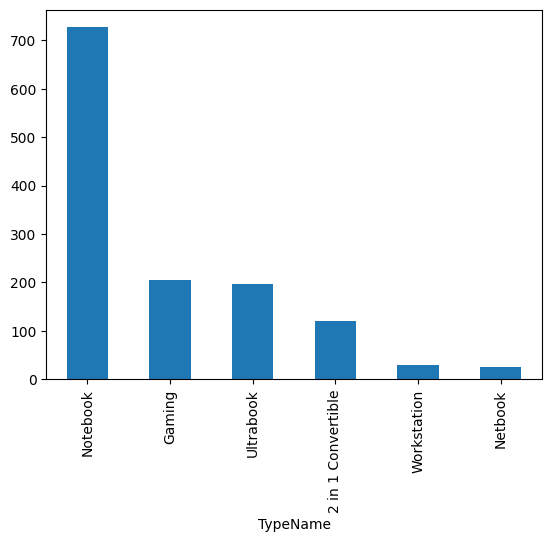

In [18]:
data['TypeName'].value_counts().plot(kind='bar')

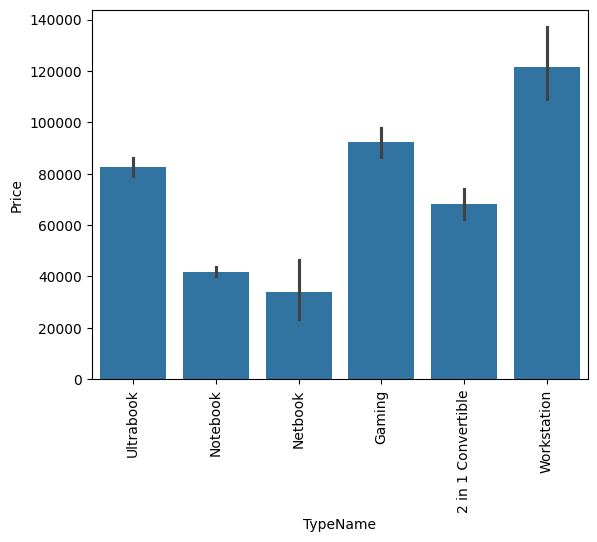

In [19]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

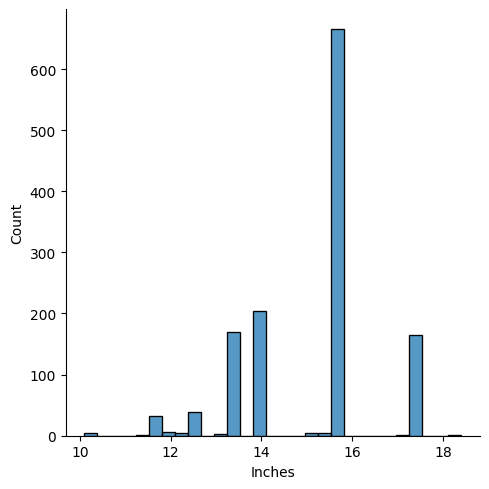

In [20]:
sns.displot(data['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

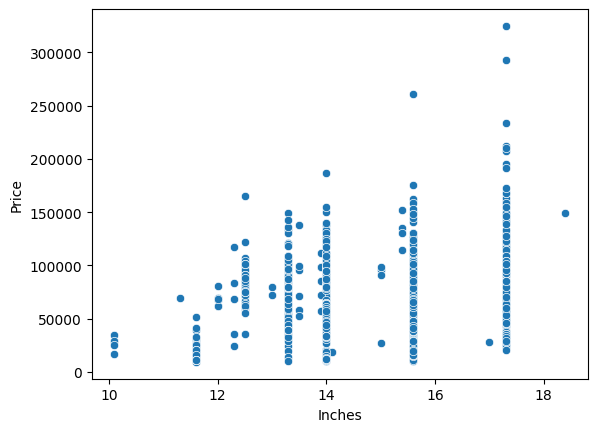

In [21]:
sns.scatterplot(x=data['Inches'],y=data['Price'])

In [22]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [23]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
424,Dell,Gaming,17.3,IPS Panel 2560x1440,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,149130,0
378,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15238,0
163,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,57489,0
325,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,15557,0
142,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.40,46300,0
627,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,No OS,2.20,24935,0
55,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,40908,0
579,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Linux,2.20,39907,0
1003,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.64,41505,0
1023,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,63159,0


<Axes: xlabel='Touchscreen'>

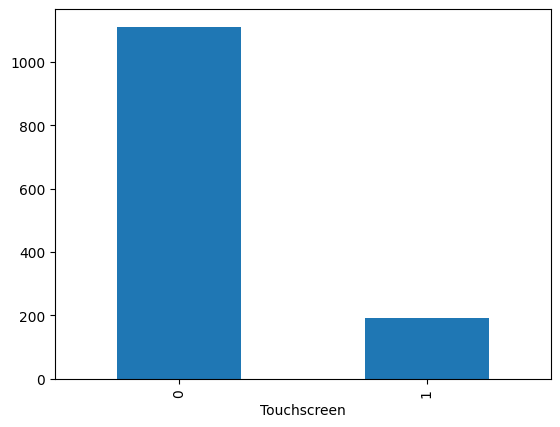

In [25]:
data['Touchscreen'].value_counts().plot(kind='bar')

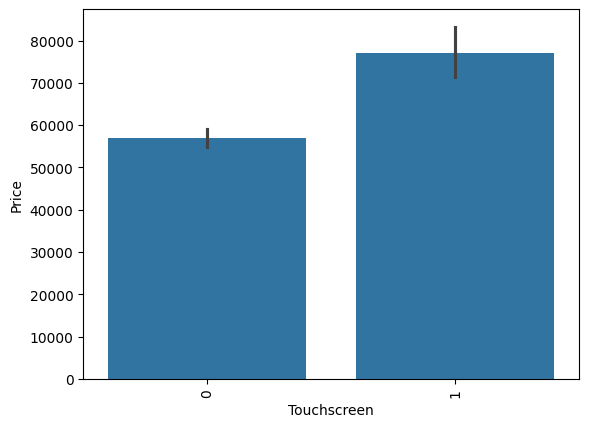

In [26]:
sns.barplot(x=data['Touchscreen'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [46]:
data.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
463,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,AMD Radeon R7 M460,No OS,1.50,42570,0,1
364,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,256GB SSD,Nvidia GeForce 920MX,No OS,2.20,26586,0,0
984,Toshiba,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.75,48751,0,0
1202,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.00,68464,1,0
1095,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,42570,0,0
719,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,63936,0,0


<Axes: xlabel='IPS'>

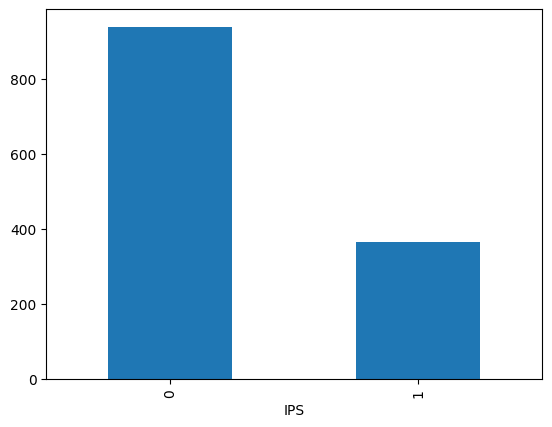

In [47]:
data['IPS'].value_counts().plot(kind='bar')

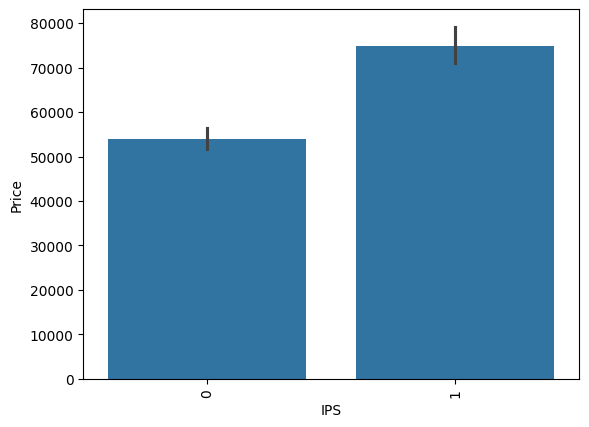

In [48]:
sns.barplot(x=data['IPS'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
new=data['ScreenResolution'].str.split('x',n=1,expand = True)

In [50]:
data['x_res'] = new[0]
data['y_res'] = new[1]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,IPS Panel Retina Display 2560,1600


In [51]:
data['x_res'] = data['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [52]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600


In [53]:
data['x_res'] = data['x_res'].astype(int)
data['y_res'] = data['y_res'].astype(int)

In [54]:
data['ppi'] = (((data['x_res']**2) + (data['y_res']**2))**0.5/data['Inches']).astype(float)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int32  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(2), int32(4), int64

In [56]:
data.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [57]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005


In [58]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [59]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [60]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


In [61]:
def fetch_processor(text):
    if text =='Intel Core i5' or text  == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [62]:
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)
data.sample(7)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
1157,Lenovo,Ultrabook,Intel Core i7 6600U 2.6GHz,12,512GB SSD,Intel HD Graphics 520,Windows 7,1.40,122490,0,0,157.350512,Intel Core i7,Intel Core i7
188,Acer,Ultrabook,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.12,52693,0,1,165.632118,Intel Core i5,Intel Core i5
325,Lenovo,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,15557,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
983,Fujitsu,Notebook,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,34578,0,0,100.454670,Intel Core i5,Intel Core i5
550,Lenovo,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.20,26586,0,0,141.211998,Intel Core i3,Intel Core i3
1107,Lenovo,2 in 1 Convertible,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,2.10,46193,1,1,141.211998,Intel Core i5,Intel Core i5
299,Asus,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63,78215,0,0,141.211998,Intel Core i7,Intel Core i7


<Axes: xlabel='Cpu brand'>

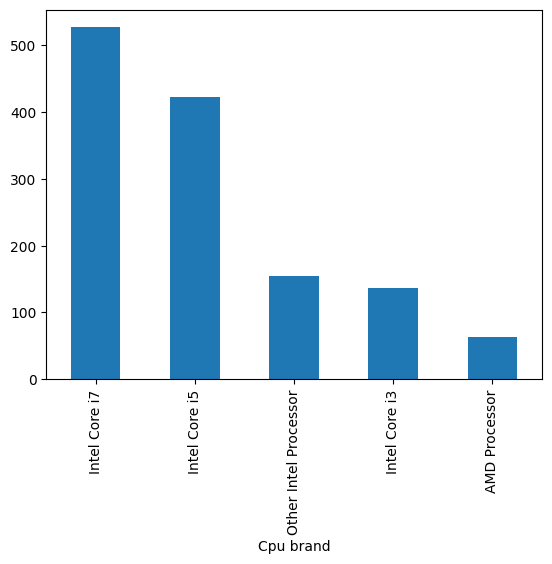

In [63]:
data['Cpu brand'].value_counts().plot(kind='bar')

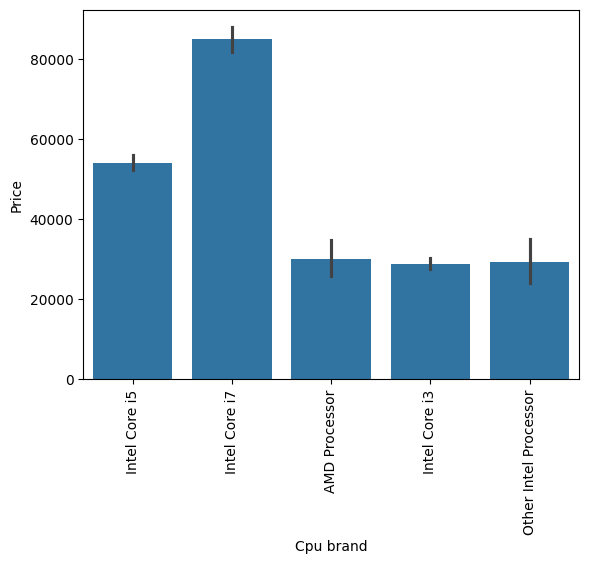

In [64]:
sns.barplot(x=data['Cpu brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
data.drop(columns=['Cpu','Cpu Name'],inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5


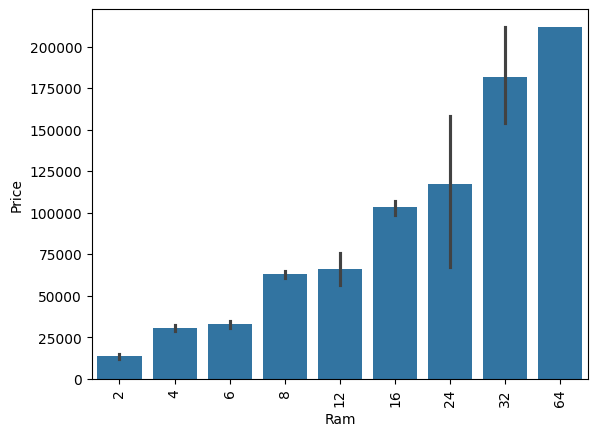

In [66]:
sns.barplot(x=data['Ram'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [68]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]= data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# data['first'] = data['first'].str.replace(r'\D', '')
data['first'] = data['first'].apply(lambda x: ''.join(filter(str.isdigit, x)))

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# data['second'] = data['second'].str.replace(r'\D', '')
data['second'] = data['second'].apply(lambda x: ''.join(filter(str.isdigit, x)))


data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage','Memory','Hybrid','Flash_Storage'],inplace=True)


In [69]:
data.sample(7)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
178,Lenovo,Notebook,8,AMD R17M-M1-70,Windows 10,1.90,43316,0,0,141.211998,Intel Core i5,1000,128
973,Toshiba,Notebook,8,Intel HD Graphics 520,Windows 10,1.95,62870,0,0,157.350512,Intel Core i5,0,256
639,Dell,Notebook,16,Nvidia GeForce GTX 1050,Windows 10,2.06,127818,1,0,282.423996,Intel Core i7,0,1000
743,Lenovo,2 in 1 Convertible,8,Intel HD Graphics 620,Windows 10,1.70,53226,1,0,157.350512,Intel Core i5,0,256
95,Acer,2 in 1 Convertible,8,Intel UHD Graphics 620,Windows 10,1.50,45128,1,1,165.632118,Intel Core i5,0,256
1293,Lenovo,Notebook,8,Nvidia GeForce GTX 960M,Windows 10,2.60,47898,0,1,141.211998,Intel Core i7,1000,0
289,Lenovo,Notebook,8,Nvidia GeForce 940MX,No OS,2.20,35112,0,0,141.211998,Intel Core i7,1000,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   int32  
 7   Touchscreen  1303 non-null   int64  
 8   IPS          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  Cpu brand    1303 non-null   object 
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
dtypes: float32(1), float64(1), int32(2), int64(4), object(5)
memory usage: 117.2+ KB


In [71]:
# data.corr()['Price']
data[['Ram','Weight','Price','Touchscreen','IPS','ppi','HDD','SSD']].corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
ppi            0.473487
HDD           -0.096442
SSD            0.670799
Name: Price, dtype: float64

In [72]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [73]:
data = data[data['Gpu brand'] != 'ARM']
data['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

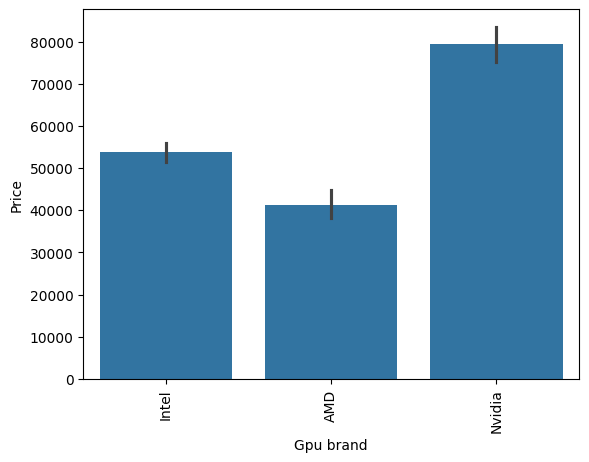

In [74]:
sns.barplot(x=data['Gpu brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [75]:
data.drop(columns=['Gpu'],inplace=True)

In [76]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [77]:
data['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [78]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

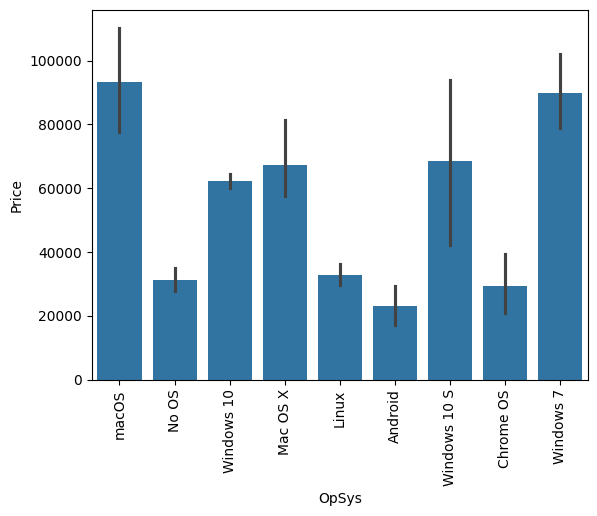

In [79]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [80]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/Linux/No OS'

In [81]:
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace = True)


In [82]:
data.sample(9)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
1242,Acer,Notebook,4,2.40,19276,0,0,100.454670,Intel Core i3,500,0,Intel,Other/Linux/No OS
76,Lenovo,Notebook,8,2.20,27652,0,0,141.211998,Intel Core i5,2000,0,Intel,Other/Linux/No OS
277,Acer,Notebook,8,2.20,39693,0,1,141.211998,Intel Core i7,1000,0,Nvidia,windows
766,Asus,Notebook,4,2.80,25059,0,0,90.583402,Other Intel Processor,1000,0,Nvidia,windows
623,Fujitsu,Notebook,8,2.20,42570,0,0,100.454670,Intel Core i5,0,256,Intel,windows
1180,Lenovo,2 in 1 Convertible,8,1.36,87219,1,1,209.800683,Intel Core i5,0,256,Intel,windows
245,Dell,Notebook,8,2.20,52480,0,0,141.211998,Intel Core i7,2000,128,AMD,windows
790,Asus,Gaming,8,2.24,71341,0,0,141.211998,Intel Core i7,1000,128,Nvidia,windows
176,Acer,Notebook,4,2.10,23922,0,0,100.454670,Intel Core i3,0,128,Intel,windows


<Axes: xlabel='Weight', ylabel='Price'>

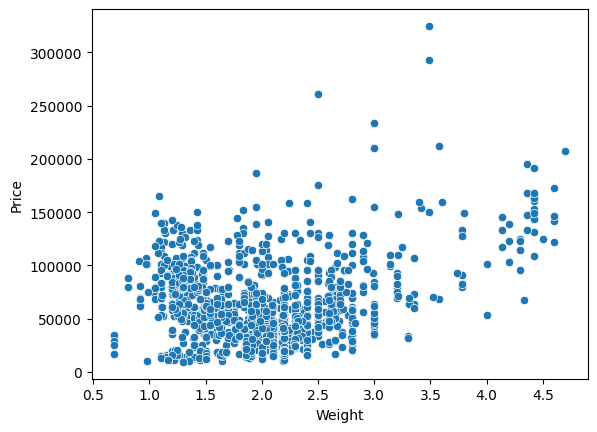

In [83]:
sns.scatterplot(x=data['Weight'],y=data['Price'])

<Axes: >

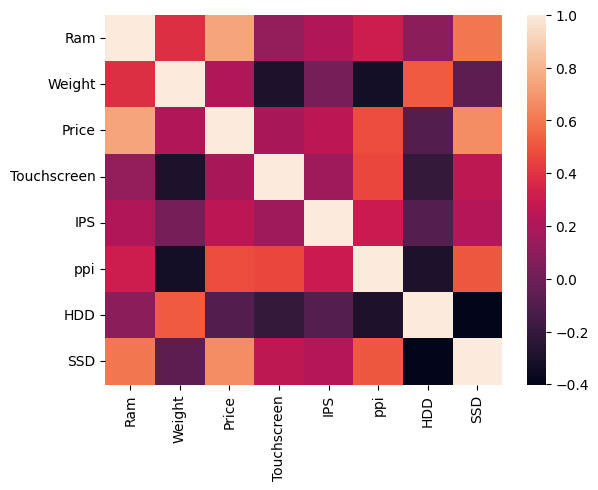

In [84]:
# sns.heatmap(data.corr())
sns.heatmap(data[['Ram','Weight','Price','Touchscreen','IPS','ppi','HDD','SSD']].corr())


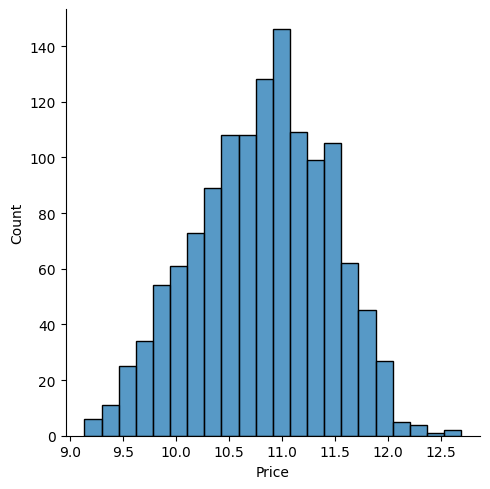

In [85]:
sns.displot(np.log(data['Price']))

In [86]:
x = data.drop(columns=['Price'])
# y = data['Price']
y = np.log(data['Price'])

In [87]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,windows


In [1]:
y

NameError: name 'y' is not defined

In [89]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [91]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2, random_state=6227)

### Linear Regression

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
# scores.append(r2_score(y_test,y_pred))
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))
# print(scores[np.argmax(scores)])
# print(np.argmax(scores))

r2 Score  0.8777441642057968
MAE Score  0.18025727832178387


### Ridge Regresssion

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.8639472376520968
MAE Score  0.19083370351799284


### KNN

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.8204786256330097
MAE Score  0.20932967042089515


### Decision Tree

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.8536509482727666
MAE Score  0.18811135456202968


### SVM

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.7903736139278059
MAE Score  0.1944285006947468


### Random Forest

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                                )
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.910650195727257
MAE Score  0.14888758885842143


### Extra Tree

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15
                                )
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.9067889597080929
MAE Score  0.15315984495533805


### AdaBoost

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,
                         learning_rate=1.0)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.8078962593339771
MAE Score  0.23734414935446396


### Gradient Boost

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=100)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.9020968022506672
MAE Score  0.15584490244415491


### Xgboost

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(max_depth=5,learning_rate=0.5)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.908741877018749
MAE Score  0.14589567640511486


### Voting Regressor

In [107]:
from sklearn.ensemble import VotingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

# y_pred
print("r2 Score ",r2_score(y_test,y_pred))
print("MAE Score ",mean_absolute_error(y_test,y_pred))

r2 Score  0.9108648451875391
MAE Score  0.14882438321051708


## Random Forest gives maximum r2 score 
### Exporting model using random forest classifier

In [108]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))
pickle.dump(data, open('data.pkl', 'wb'))

In [110]:
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Other/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,12201,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,40705,0,0,100.454670,Intel Core i7,1000,0,AMD,windows
